In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import random

In [2]:
def formatPrice(n):
    return ("-" if n < 0 else "") + "{0:.2f}".format(abs(n))

In [3]:
def get_state(data, t, n):
    d = t - n + 1
    block = data[d : t + 1] if d >= 0 else -d * [data[0]] + data[0 : t + 1]
    res = []
    for i in range(n - 1):
        res.append(block[i + 1] - block[i])
    return np.array([res])

In [4]:
df = pd.read_csv('dataset/VALE.csv')
df =df[::-1]

In [5]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
1952,2018-12-31,13.170000,13.260000,13.050000,13.190000,13.190000,9599600
1951,2018-12-28,13.050000,13.160000,12.920000,13.020000,13.020000,13777600
1950,2018-12-27,12.700000,12.990000,12.650000,12.990000,12.990000,18651400
1949,2018-12-26,12.680000,13.070000,12.550000,13.070000,13.070000,16587500
1948,2018-12-24,12.820000,13.030000,12.590000,12.600000,12.600000,11224100
1947,2018-12-21,13.090000,13.230000,12.830000,12.900000,12.900000,21755100
1946,2018-12-20,13.130000,13.250000,12.770000,12.940000,12.940000,29154500
1945,2018-12-19,13.370000,13.500000,12.620000,12.730000,12.730000,32017500
1944,2018-12-18,13.190000,13.360000,13.080000,13.190000,13.190000,20005800
1943,2018-12-17,13.120000,13.410000,12.950000,13.030000,13.030000,22045600


In [5]:
test = pd.read_csv('dataset/VALE_teste.csv')
test = test[::-1]

In [6]:
close = df.Close.values.tolist()
test = test.Close.values.tolist()

In [7]:
class Deep_Evolution_Strategy:

    inputs = None

    def __init__( self, weights, reward_function, population_size, sigma, learning_rate):
        self.weights = weights
        self.reward_function = reward_function
        self.population_size = population_size
        self.sigma = sigma
        self.learning_rate = learning_rate

    def get_weight_from_population(self, weights, population):
        weights_population = []
        for index, i in enumerate(population):
            jittered = self.sigma * i
            weights_population.append(weights[index] + jittered)
        return weights_population

    def get_weights(self):
        return self.weights

    def train(self, epoch, print_every):
        lasttime = time.time()
        for i in range(epoch):
            population = []
            rewards = np.zeros(self.population_size)
            for k in range(self.population_size):
                x = []
                for w in self.weights:
                    x.append(np.random.randn(*w.shape))
                population.append(x)
            for k in range(self.population_size):
                weights_population = self.get_weight_from_population(
                    self.weights, population[k]
                )
                rewards[k] = self.reward_function(weights_population)
            rewards = (rewards - np.mean(rewards)) / np.std(rewards)
            for index, w in enumerate(self.weights):
                A = np.array([p[index] for p in population])
                self.weights[index] = (w + self.learning_rate / (self.population_size * self.sigma) * np.dot(A.T, rewards).T)
            if (i + 1) % print_every == 0:
                print(
                    'episode %d. reward: %f'
                    % (i + 1, self.reward_function(self.weights))
                )
        print('time taken to train:', time.time() - lasttime, 'seconds')


class Model:
    def __init__(self, input_size, layer_size, output_size):
        self.weights = [
            np.random.randn(input_size, layer_size),
            np.random.randn(layer_size, output_size),
            np.random.randn(layer_size, 1),
            np.random.randn(1, layer_size),
        ]

    def predict(self, inputs):
        feed = np.dot(inputs, self.weights[0]) + self.weights[-1]
        decision = np.dot(feed, self.weights[1])
        return decision

    def get_weights(self):
        return self.weights

    def set_weights(self, weights):
        self.weights = weights

In [8]:
class Agent:

    POPULATION_SIZE = 33
    SIGMA = 0.36
    LEARNING_RATE = 0.48

    def __init__(self, model):
        self.model = model
        self.es = Deep_Evolution_Strategy(
            self.model.get_weights(),
            self.get_reward,
            self.POPULATION_SIZE,
            self.SIGMA,
            self.LEARNING_RATE,
        )

    def act(self, sequence):
        decision = self.model.predict(np.array(sequence))
        return np.argmax(decision[0])

    def get_reward(self, weights):
        start_capital = 50
        capital = start_capital 
        l = len(close) - 1
        self.model.weights = weights
        window_size = 37
        state = get_state(close, 0, window_size + 1)
        inventory = []
        for t in range(0, l):
            action = self.act(state)
            
            #hold
            next_state = get_state(close, t + 1, window_size + 1)
            
            #buy
            if action == 1 and capital >= close[t]:
                inventory.append(close[t])
                capital -= close[t]
            
            #sell
            elif action == 2 and len(inventory) > 0:
                bought_price = inventory.pop(0)
                capital += close[t]

            state = next_state
        return ((capital - start_capital)/start_capital)*100

    def fit(self, iterations, checkpoint):
        self.es.train(iterations, print_every = checkpoint)

    def buy(self):
        start_capital = 50
        capital = start_capital
        window_size = 37
        state = get_state(close, 0, window_size + 1)
        states_sell = []
        states_buy = []
        inventory = []
        total_profit = 0
        l = len(test) - 1
        buy = True
        sell = False
        for t in range(0, l):
            action = self.act(state)
            
            #hold
            next_state = get_state(test, t + 1, window_size + 1)
            
            #buy
            if action == 1 and capital >= test[t]:
                capital -= test[t]
                inventory.append(test[t])
                total_profit -= test[t]
                states_buy.append(t)
                print ("Buy: " + formatPrice(test[t]))
            
            #sell
            elif action == 2 and len(inventory) > 0:
                bought_price = inventory.pop(0)
                capital += test[t]
                total_profit += test[t]
                states_sell.append(t)
                print ("Sell: " + formatPrice(test[t]) + " | Profit: " + formatPrice(test[t] - bought_price))
            
            state = next_state

        print('\nTotal %f' % (total_profit))
        plt.figure(figsize = (40, 20))
        plt.plot(test, label = 'true close', c = 'g')
        plt.plot(
            test, 'X', label = 'predict buy', markevery = states_buy, c = 'b'
        )
        plt.plot(
            test, 'o', label = 'predict sell', markevery = states_sell, c = 'r'
        )
        plt.legend()
        plt.show()

In [10]:
window_size = 37
model = Model(window_size, 602, 3)
agent = Agent(model)
agent.fit(700, 10)

episode 10. reward: 157.860020
episode 20. reward: 473.540012
episode 30. reward: 242.400018
episode 40. reward: 462.100006
episode 50. reward: 603.700000
episode 60. reward: 473.139996
episode 70. reward: 789.000006
episode 80. reward: 1039.160008
episode 90. reward: 811.280052
episode 100. reward: 702.940038
episode 110. reward: 811.160026
episode 120. reward: 1131.320018
episode 130. reward: 1058.140008
episode 140. reward: 1082.900050
episode 150. reward: 1181.360050
episode 160. reward: 1286.640062
episode 170. reward: 1300.260038
episode 180. reward: 1309.660018
episode 190. reward: 998.320030
episode 200. reward: 1416.320022
episode 210. reward: 1289.380030
episode 220. reward: 1185.300044
episode 230. reward: 1225.680006
episode 240. reward: 1259.240036
episode 250. reward: 1153.680036
episode 260. reward: 1394.240028
episode 270. reward: 1334.340044
episode 280. reward: 1484.880034
episode 290. reward: 1375.140044
episode 300. reward: 1268.840026
episode 310. reward: 1043.6000

Buy: 13.06
Buy: 12.63
Buy: 12.67
Sell: 13.49 | Profit: 0.43
Sell: 13.70 | Profit: 1.07
Sell: 13.28 | Profit: 0.61
Buy: 13.15
Buy: 13.28
Sell: 12.99 | Profit: -0.16
Buy: 12.59
Buy: 12.60
Buy: 12.49
Sell: 12.03 | Profit: -1.25
Buy: 12.23
Sell: 12.15 | Profit: -0.44
Buy: 12.57
Sell: 12.44 | Profit: -0.16
Sell: 12.59 | Profit: 0.10
Sell: 11.48 | Profit: -0.75
Buy: 11.20
Buy: 13.66
Sell: 14.75 | Profit: 2.18
Sell: 14.45 | Profit: 3.25
Sell: 14.61 | Profit: 0.95
Buy: 14.06
Buy: 14.11
Sell: 14.51 | Profit: 0.45
Sell: 14.06 | Profit: -0.05

Total 6.230000


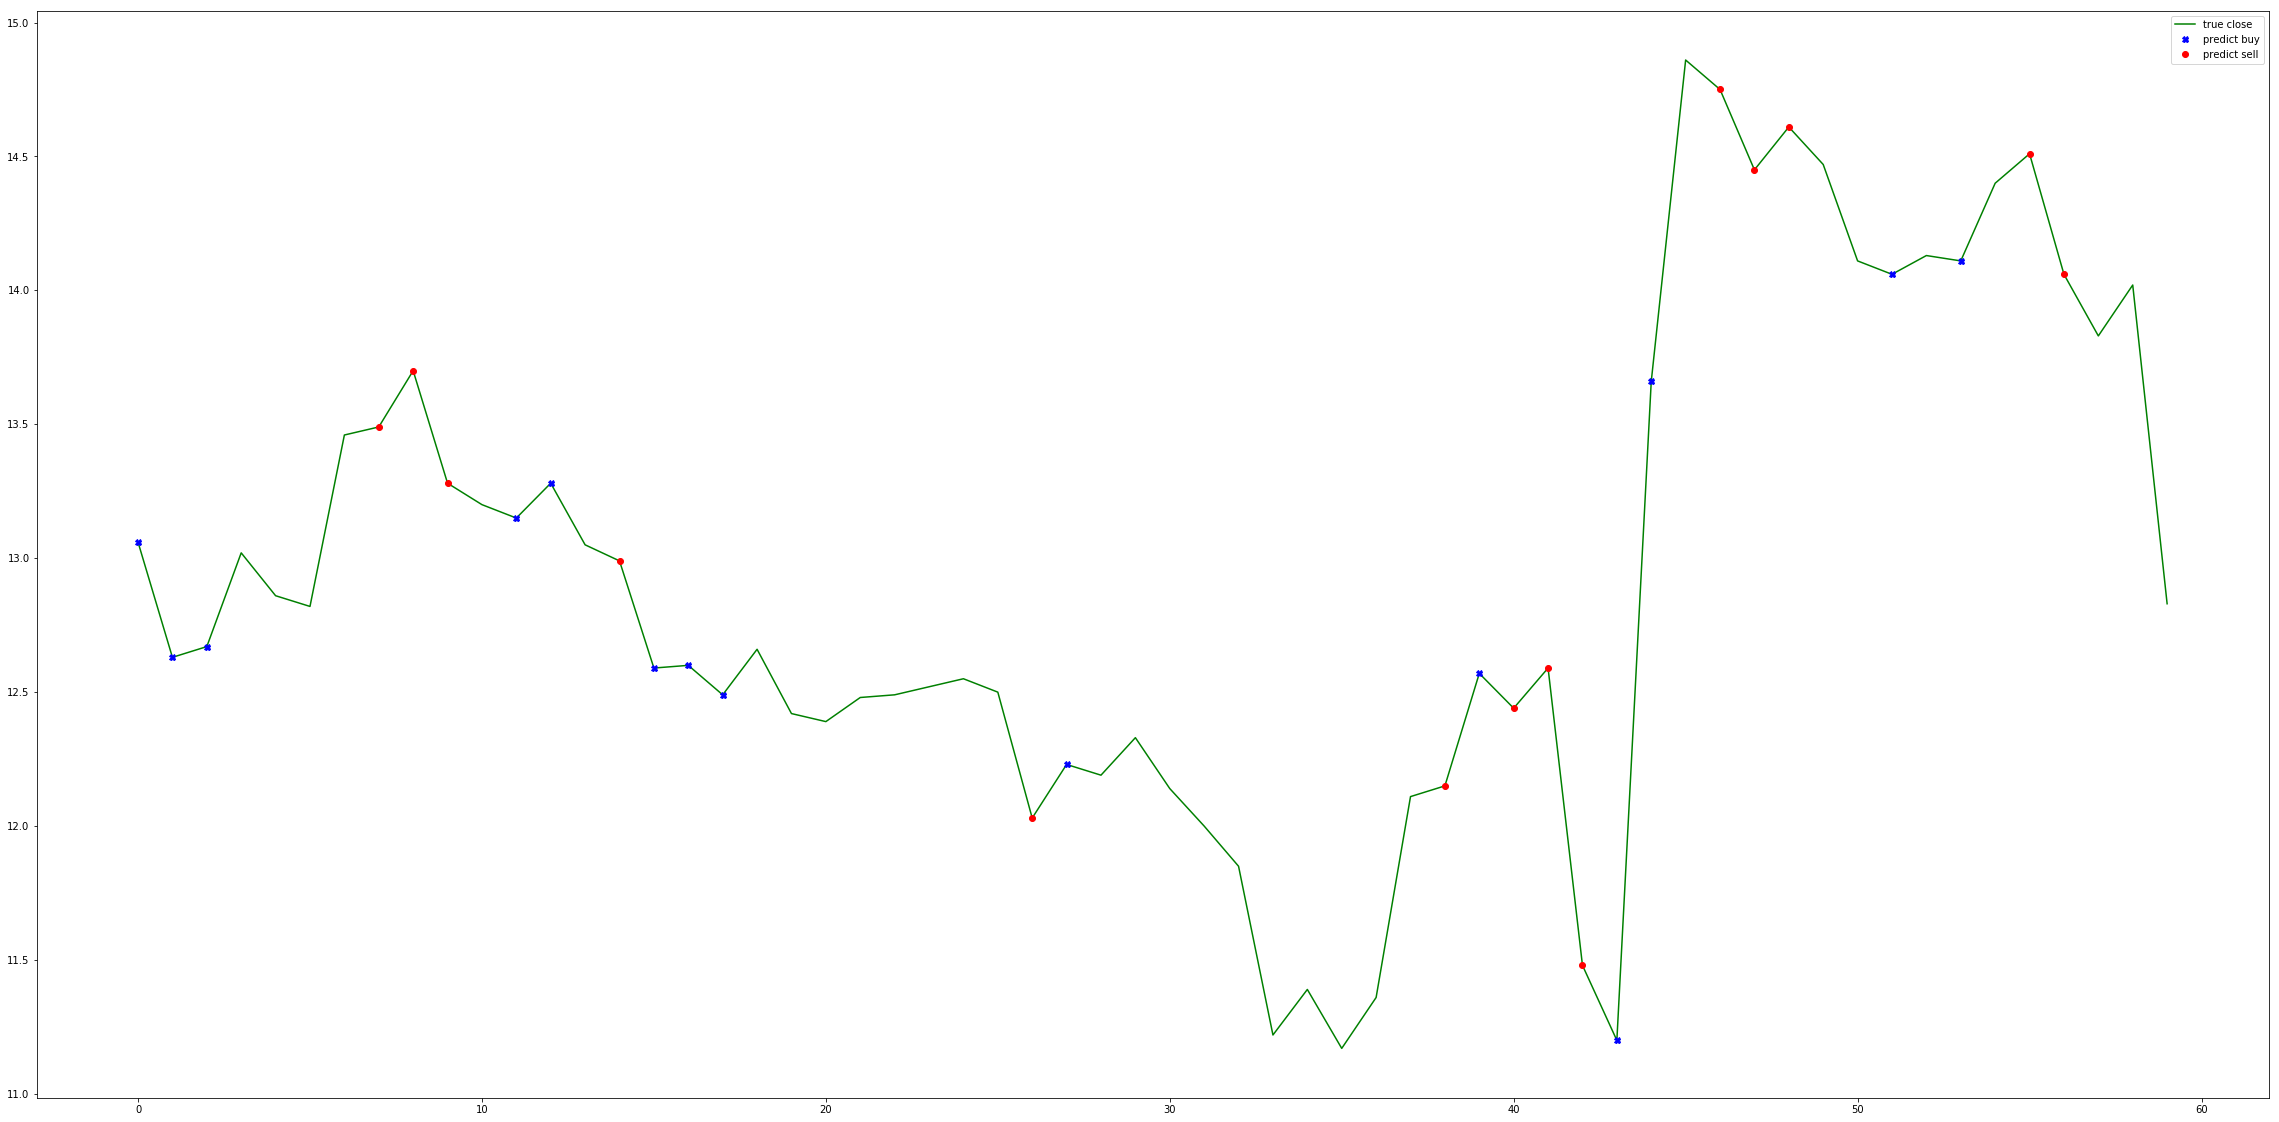

In [11]:
agent.buy()